In [1]:
from scipy.io import arff
import pandas
import numpy as np
import seaborn as sns
import math
import operator
import scipy

### Reading Test Data and Train Data

In [2]:
# reading arff files 
import arff
dataset = arff.load(open('trainProdSelection.arff'))
train_data=pandas.DataFrame(dataset['data'])
train_attributes=pandas.DataFrame(dataset['attributes'])
train_attributes[0]
train_data.columns=train_attributes[0]
train_data

#test data
test_dataset=arff.load(open('testProdSelection.arff'))
test_data=pandas.DataFrame(test_dataset['data'])
test_attributes=pandas.DataFrame(test_dataset['attributes'])
test_attributes[0]
test_data.columns=test_attributes[0]

In [3]:
dataset

{'attributes': [('Type',
   ['student', 'engineer', 'librarian', 'professor', 'doctor']),
  ('LifeStyle',
   ['spend<<saving', 'spend<saving', 'spend>saving', 'spend>>saving']),
  ('Vacation', 'REAL'),
  ('eCredit', 'REAL'),
  ('salary', 'REAL'),
  ('property', 'REAL'),
  ('label', ['C1', 'C2', 'C3', 'C4', 'C5'])],
 'data': [['student', 'spend>saving', 6.0, 40.0, 13.62, 3.2804, 'C1'],
  ['student', 'spend>saving', 11.0, 21.0, 15.32, 2.0232, 'C1'],
  ['student', 'spend>saving', 7.0, 64.0, 16.55, 3.1202, 'C1'],
  ['student', 'spend>saving', 3.0, 47.0, 15.71, 3.4022, 'C1'],
  ['student', 'spend>saving', 15.0, 10.0, 16.96, 2.2825, 'C1'],
  ['student', 'spend>saving', 6.0, 80.0, 15.5, 3.7338, 'C1'],
  ['student', 'spend<saving', 10.0, 49.0, 16.86, 5.8639, 'C1'],
  ['student', 'spend<saving', 10.0, 84.0, 14.66, 3.187, 'C1'],
  ['student', 'spend<saving', 9.0, 74.0, 13.86, 2.3823, 'C1'],
  ['student', 'spend>>saving', 22.0, 38.0, 13.88, 0.7394, 'C1'],
  ['student', 'spend>>saving', 25.0, 30.0

In [4]:
# test_data = pd.read_csv("test_data.csv")
# train_data=pd.read_csv("train_data.csv")
# test_data.head()

In [5]:
test_label=list(test_data['label'])
test_label

['C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1']

In [6]:
train_label=list(train_data['label'])
train_label

['C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',

In [7]:
train_data.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,6.0,40.0,13.62,3.2804,C1
1,student,spend>saving,11.0,21.0,15.32,2.0232,C1
2,student,spend>saving,7.0,64.0,16.55,3.1202,C1
3,student,spend>saving,3.0,47.0,15.71,3.4022,C1
4,student,spend>saving,15.0,10.0,16.96,2.2825,C1


In [8]:
test_data.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,12.0,19.0,14.7900,3.7697,C1
1,student,spend>>saving,29.0,10.0,16.1900,2.4839,C1
2,student,spend<<saving,28.0,60.0,15.4600,1.1885,C1
3,engineer,spend>saving,15.0,41.0,21.2600,1.4379,C1
4,librarian,spend<saving,2.0,9.0,19.7207,0.6913,C1


### dropping label column

In [9]:
test_data=test_data.drop(['label'],axis=1)
train_data=train_data.drop(['label'],axis=1)


In [10]:
test_data.head()

,Type,LifeStyle,Vacation,eCredit,salary,property
0,student,spend<saving,12.0,19.0,14.7900,3.7697
1,student,spend>>saving,29.0,10.0,16.1900,2.4839
2,student,spend<<saving,28.0,60.0,15.4600,1.1885
3,engineer,spend>saving,15.0,41.0,21.2600,1.4379
4,librarian,spend<saving,2.0,9.0,19.7207,0.6913


### Normalization

In [11]:
col=['Vacation','eCredit','salary','property']
train_data[col]=(train_data[col]).apply(lambda x: (x - min(x)) / (max(x)-min(x)))
test_data[col]=(test_data[col]).apply(lambda x: (x - min(x)) /(max(x)-min(x)))

### One hot enoding

In [12]:
train_data=pandas.get_dummies(train_data,prefix=['Type','LifeStyle'],drop_first=True)
test_data=pandas.get_dummies(test_data,prefix=['Type','LifeStyle'],drop_first=True)

In [13]:
train_data.head()

,Vacation,eCredit,salary,property,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0.079365,0.107558,0.219960,0.183167,0,0,0,1,0,0,1
1,0.158730,0.052326,0.293102,0.112797,0,0,0,1,0,0,1
2,0.095238,0.177326,0.346023,0.174200,0,0,0,1,0,0,1
3,0.031746,0.127907,0.309882,0.189984,0,0,0,1,0,0,1
4,0.222222,0.020349,0.363663,0.127311,0,0,0,1,0,0,1


In [14]:
# def equlidean_distance(l,train_row,test_row):
#     dist=0
#     for i in range(l):
#         dist=dist+pow((train_row[i]-test_row[i]),2)
#     #print(dist)
#     return math.sqrt(dist)

### calculating euclidean_distance and performing knn

In [15]:
import math
import pandas as pd
import operator
def euclidean_distance(x,y):
    dist = 0.0
    for i in range(len(x)):
        dist = dist+math.pow((float(x[i])-float(y[i])),2)
    dist = math.sqrt(dist)
    return dist
result1=[]
def knn_match(train,test,k,train_label):
    p=0
    for index, i in test.iterrows():
        list_1=[]
        flag=[]
        count={}
        for index1, j in train.iterrows():
            dist=euclidean_distance(i,j)
            list_1.append((dist,train_label[index1]))
        list_1.sort(key=operator.itemgetter(0))
        flag=list_1[:k]
        
        for a in flag:
            if a[1] in count:
                count[a[1]]=count[a[1]]+1
            else:
                count[a[1]]=1
        val=list(count.items())
        d=pd.DataFrame(val)
        dist_filter=d[d[1]==d[1].max()]
        res= dist_filter.sort_values(by = 0,ascending=True).head(1)
  
        result1.append(res[0].values[0])

In [16]:
# assign_label=[]
# k=5
# # calculating equalidean dist between the neighbouring points
# def equlidean_dist(l,train_row,test_row):
#     dist=0
#     for i in range(l):
#         dist=dist+pow((train_row[i]-test_row[i]),2)
#     #print(dist)
#     return math.sqrt(dist)
# #------------------------------------------------------------------------------
# #getting the k near neighbours near the test data set
# def get_neighbours(train_rows,test_row,k):
#     l=len(test_row)-1
#     dist=[]
#     for i in range(len(train_rows)):
#             dist=equlidean_dist(l,train_rows[i],test_row)
#             dist.append((train_rows[i],dist))
#     dist.sort(key=operator.itemgetter(1))
#     neighbours=[]
#     for j in range(k):
#         neighbours.append(dist[j][0])
#     #print(neighbours)
#     return neighbours
# #--------------------------------------------------------------------------------
# #calculating the votes
# def calculate_votes(neighbours):
#     votes={}
#     for i in range(len(neighbours)):
#         label=neighbours[i][-1]
#         if label in votes:
#             votes[label]+=1
#         else:
#             votes[label]=1
#     sorted_votes=sorted(votes.items(),key=operator.itemgetter(1),reverse=True)
#     return sorted_votes[0][0]
# #--------------------------------------------------------------------------------
# #calculating the accuracy 
# def calculate_accuracy(test_rows,assign_label):
#     validate=0
#     for i in range(len(test_rows)):
#         if test_rows[i][-1]==assign_label[i]:
#             validate+=1
#     #print(validate)
#     return (validate/float(len(test_rows)))*100
# #--------------------------------------------------------------------------------

# for i in range(len(test)):
#     neighbours=get_neighbours(train.values,test.values[i],k)
#     votes=calculate_votes(neighbours)
#     assign_label.append(votes)
# accuracy=calculate_accuracy(test_da.values,assign_label)
# print(accuracy)

### finding accuracy through validation

In [17]:
def accuracy(label):
    positive=0
    k=0
    for i in label:
        if (i==result1[k]):
            positive=positive+1
        k=k+1
    accuracy=(positive/len(label))*100
    print(accuracy)
    return accuracy
    

In [18]:
# train_label[0]

28.57142857142857
28.57142857142857
28.57142857142857
23.809523809523807


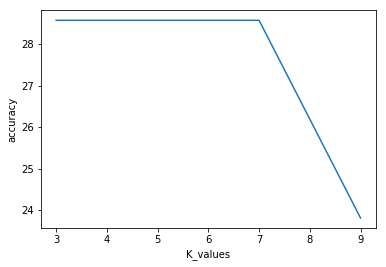

In [19]:
import matplotlib.pyplot as plt
acc=[] 
for i in range(3,10,2):
    result1=[]
    knn_match(train_data,test_data,i,train_label)
    acc.append(accuracy(test_label))
plt.plot(range(3,10,2),acc)
plt.ylabel('accuracy')
plt.xlabel('K_values')
plt.show()